# Interferometric data sets

In SMILI, interfreometric data sets are handle by *uvdata* module. Here, we show a basic usage of uvdata module using a [VLBA data set of 3C 273 at 43 GHz](3C273DEC16.UVP) of [the Boston University Blazar Group](https://www.bu.edu/blazars/VLBAproject.html).

In [1]:
%matplotlib inline
from smili import uvdata, imdata, imaging, util

# for plotting
import matplotlib.pyplot as plt

## Load/Save uvfits file and select a stokes parameter

SMILI can load a single-source uvfits files generated by eht-imaging library, AIPS task SPLIT, and DIFMAP. *uvdata.UVFITS* object handles data loaded from UVFITS file.

In [14]:
# Include class to load uvfits data
uvfits = uvdata.UVFITS("3C273DEC16.UVP")

Filename: 3C273DEC16.UVP
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 GroupsHDU      155   (3, 4, 1, 4, 1, 1)   float32   1913 Groups  7 Parameters
  1  AIPS NX       1 BinTableHDU     31   8R x 7C   [1E, 1E, 1J, 1J, 1J, 1J, 1J]   
  2  AIPS FQ       1 BinTableHDU     29   1R x 6C   [1J, 4D, 4E, 4E, 4J, 32A]   
  3  AIPS AN       1 BinTableHDU     72   10R x 14C   [8A, 3D, 0D, 1J, 1J, 1E, 1E, 4E, 1A, 1E, 8E, 1A, 1E, 8E]   

Loading HDUs in the input UVFITS files.
  Primary HDU was loaded.
  AIPS FQ Table was loaded.
  Subarray 1 was found in an AIPS AN table

Checking loaded HDUs.
  1 Subarray settings are found.
  No AIPS SU tables were found.
    Assuming that this is a single source UVFITS file.

Reading FQ Tables
  Frequency Setup ID: 1
    IF Freq setups (Hz):
         if_freq_offset  ch_bandwidth  if_bandwidth  sideband
      0             0.0    64000000.0    64000000.0         1
      1      80000000.0    64000000.0    64000000.0         1


Here are representative methods to edit uvdata.UVFITS objects.

- *avspc()* perform weighted-average complex visibilities in frequency directions.
- *weightcal()* perform recalculate sigmas and weights of data from scatter in complex visibilities over specified frequency and time segments.

In [15]:
# select Stokes I: This will create a single stokes uvfits object.
uvfits_I = uvfits.select_stokes("I")

# You can edit uvfits object by using following procedures
#uvfits_avspc = uvfits.avspc()
#uvfits_weightcal = uvfits.weightcal()

Stokes I data will be calculated from input RR and LL data


You can save uvfits files by to_uvfits instance.

In [16]:
uvfits_I.to_uvfits("3C273DEC16.stokesI.uvfits")

## Create a Visibility Table for Imaging

SMILI's imaging function is designed to use visibility data sets stored in two dimensional tables. There are three major table formats for (1) visibilities and amplitudues (*uvdata.VisTable*), (2) bi-spectram (closure phases;  *uvdata.BSTable*), and (3) closure amplitudes (*uvdata.CATable*). All of tables inherit a popular pandas.DataFrame class, so you can use data table instances like pandas.DataFrame.

Here we start from the visbility data table class *uvdata.VisTable*.

In [17]:
# Read visibilities from uvdata.VisTable objects
vtable = uvfits_I.make_vistable()

vtable.loc[0:10, :]

,utc,gsthour,freq,stokesid,ifid,chid,ch,u,v,w,uvdist,subarray,st1,st2,st1name,st2name,amp,phase,weight,sigma
0,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,6.105191e+07,2.229138e+08,-2.445611e+08,2.311231e+08,1,1,2,BR,FD,1.885444,43.039765,3.850429,0.509619
1,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,-3.265773e+08,7.199128e+07,-4.043123e+08,3.344182e+08,1,1,3,BR,HN,1.089305,45.338093,2.541920,0.627219
2,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,1.085653e+08,2.017154e+08,-1.513385e+08,2.290754e+08,1,1,4,BR,KP,3.986017,36.372964,2.925850,0.584620
3,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,4.243206e+07,1.527676e+08,-1.959372e+08,1.585510e+08,1,1,5,BR,LA,3.399448,-30.419323,1.374593,0.852929
4,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,-1.230807e+08,8.189730e+07,-2.950599e+08,1.478378e+08,1,1,7,BR,NL,7.270494,28.013670,5.071963,0.444030
5,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,1.034190e+08,1.293095e+08,-5.416693e+07,1.655791e+08,1,1,8,BR,OV,3.207430,-34.795414,3.058038,0.571845
6,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,6.721655e+07,1.714831e+08,-1.822360e+08,1.841861e+08,1,1,9,BR,PT,1.974857,-52.271663,6.026638,0.407345
7,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,-3.604489e+08,4.221343e+08,-6.135220e+08,5.550863e+08,1,1,10,BR,SC,4.721735,-13.935714,3.301363,0.550368
8,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,-3.875396e+08,-1.509233e+08,-1.597306e+08,4.158903e+08,1,2,3,FD,HN,2.406819,28.885509,169.609238,0.076785
9,2016-12-24 09:38:44.998856,15.868862,4.300750e+10,1,0,0,0,4.751136e+07,-2.119897e+07,9.322340e+07,5.202621e+07,1,2,4,FD,KP,8.917510,-21.874527,3.286803,0.551586


By default, we are using a simple csv format to save/load tables.

In [18]:
# Save visibilities to a csv file
vtable.to_csv("visibility.csv")

# Load visibility information from the save csv file
vtable = uvdata.read_vistable("visibility.csv")

*uvdata.VisTable* has simple plot methods uvplot and raplot for plotting uv-coverages and radial plots. Each function is mocking pyploy.plot or pyplot.errorbar functions, and you can use almost all of arguments for pyplot.plot or pyplot.errorbar.

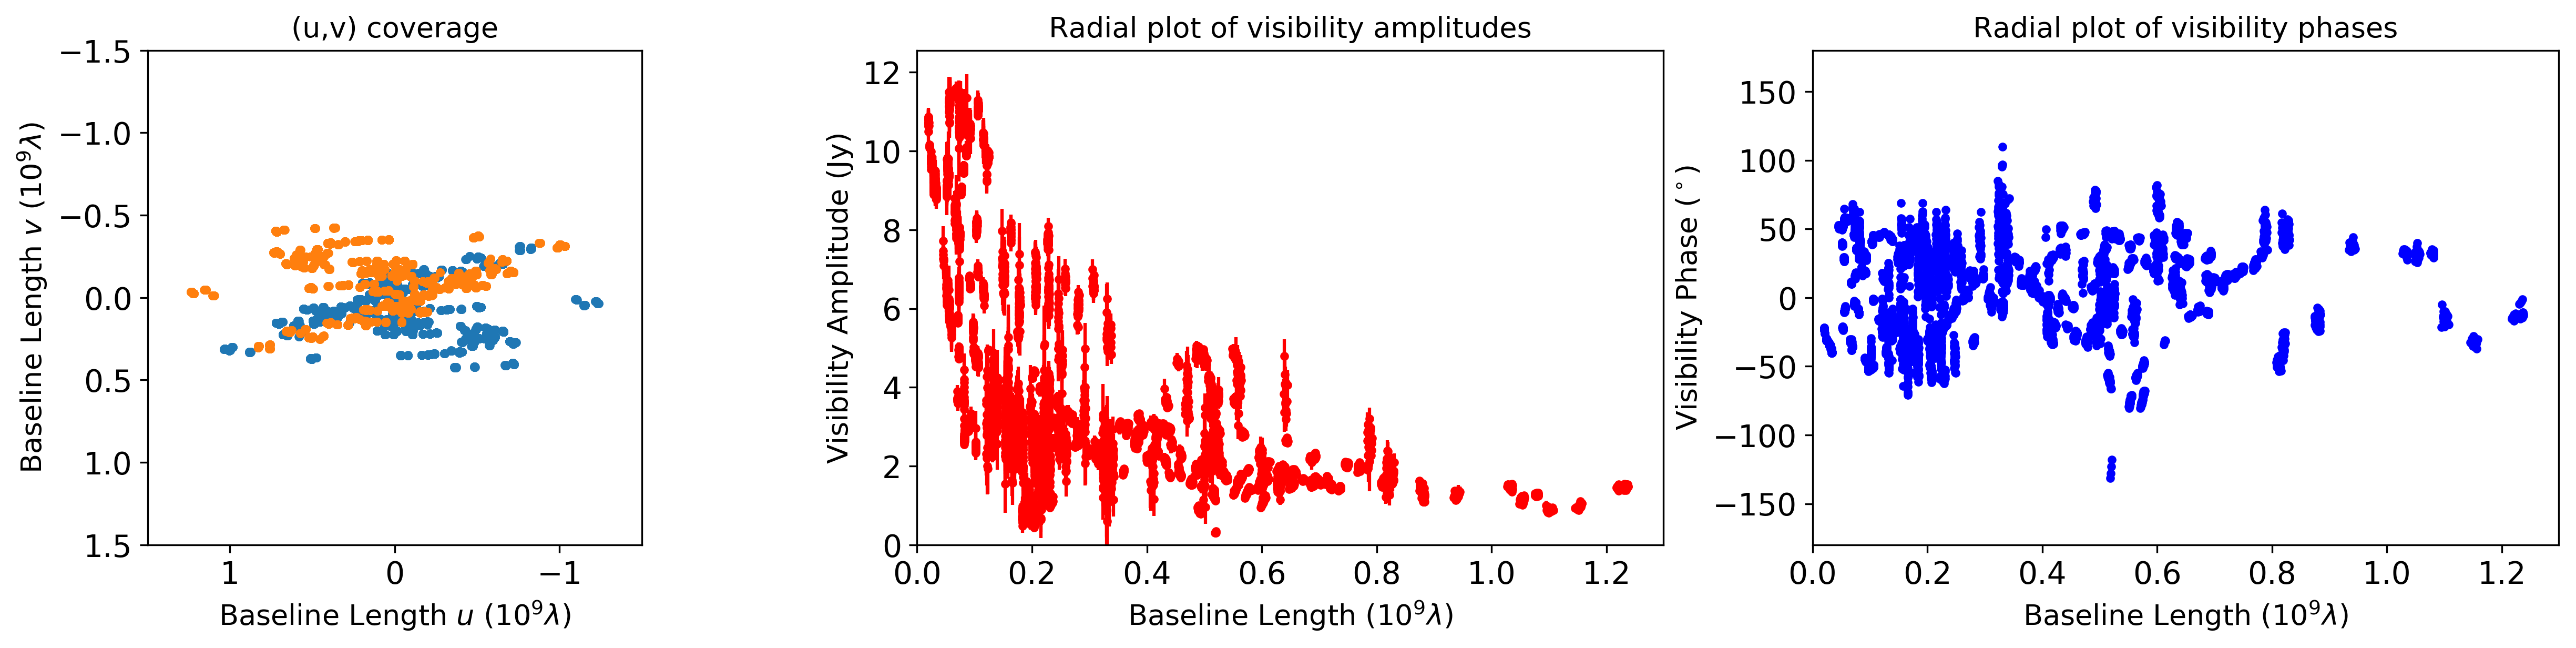

In [19]:
# You can check fundamental properties of observations and visibilities
util.matplotlibrc(ncols=3, width=500, height=300)
fig, axs = plt.subplots(ncols=3)

plt.sca(axs[0])
plt.title("(u,v) coverage")
vtable.uvplot()
plt.xlim(1.5,-1.5)
plt.ylim(1.5,-1.5)

plt.sca(axs[1])
plt.title("Radial plot of visibility amplitudes")
vtable.radplot(datatype="amp",color="red")

plt.sca(axs[2])
plt.title("Radial plot of visibility phases")
vtable.radplot(datatype="phase",color="blue")

uvdata.VisTable has more flexible plotter *vplot* for various combination of data types. Available types of data are
["utc","gst","amp","phase","sigma","real","imag","u","v","uvd","snr"].

In this example, we show the utc time dependence of visibilities.
You can also pick up a certain baseline information, where the available baselines are confirmed by vtable.baseline_list function.

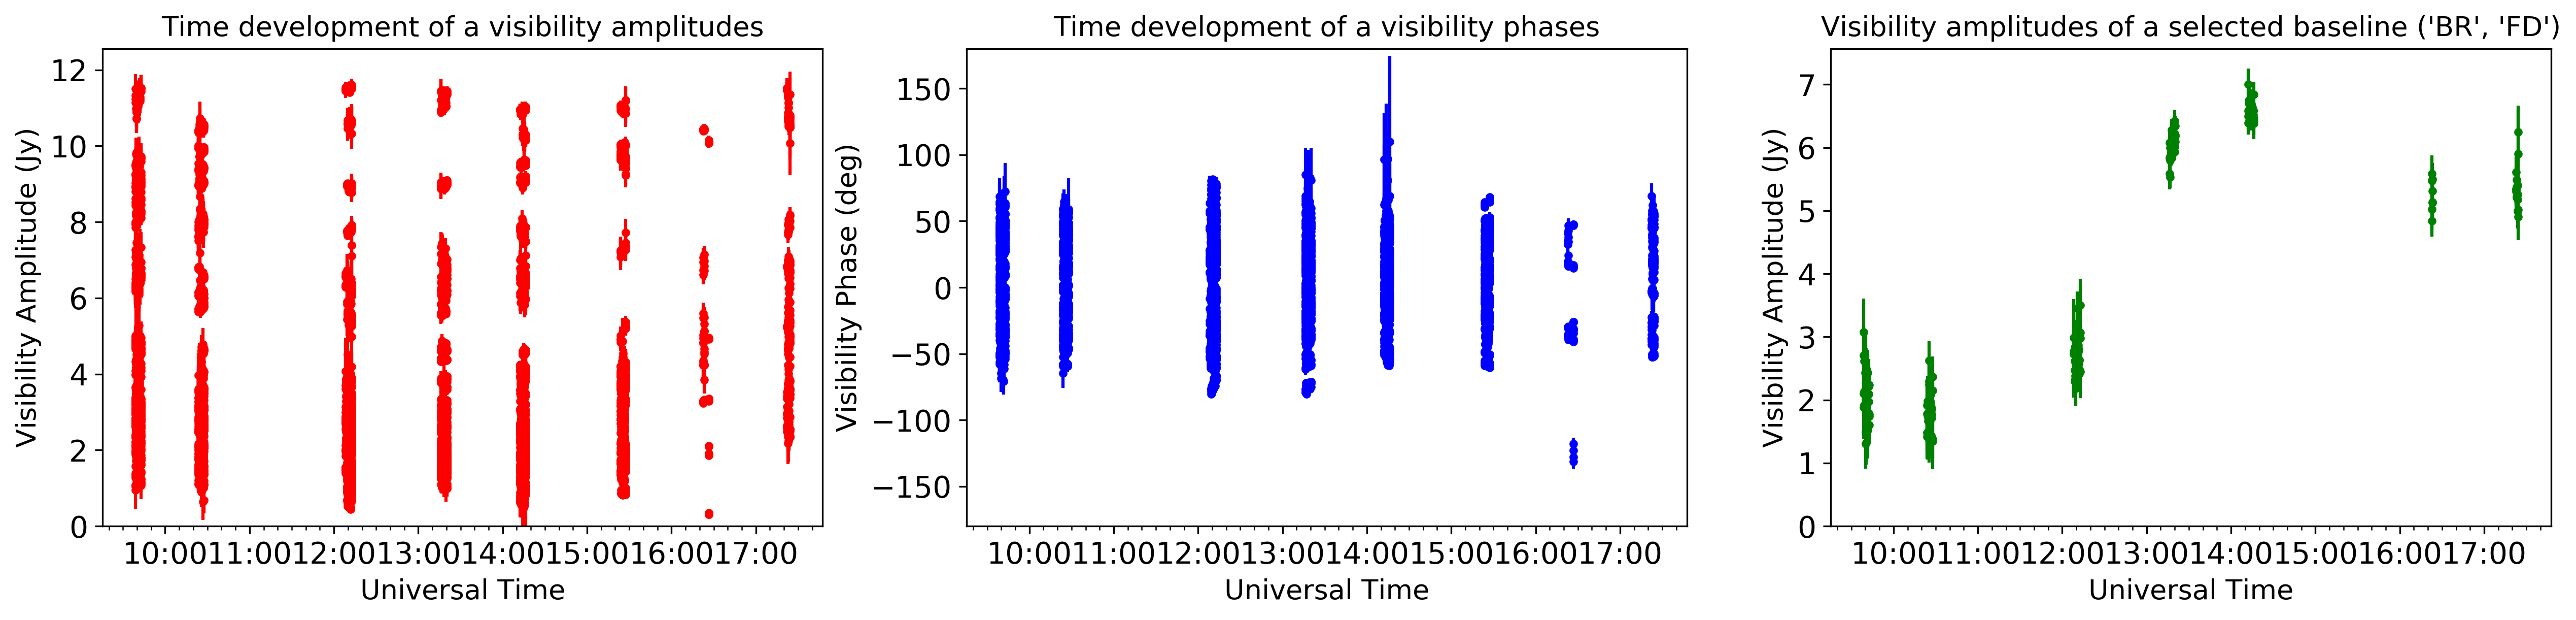

In [20]:
util.matplotlibrc(ncols=3, width=500, height=300)
fig, axs = plt.subplots(ncols=3)

plt.sca(axs[0])
plt.title("Time development of a visibility amplitudes")
vtable.vplot(axis1="utc",axis2="amp",color="red")

plt.sca(axs[1])
plt.title("Time development of a visibility phases")
vtable.vplot(axis1="utc",axis2="phase",color="blue")

plt.sca(axs[2])
plt.title("Visibility amplitudes of a selected baseline ('BR', 'FD')")
vtable.vplot(axis1="utc",axis2="amp",baseline=('BR', 'FD'),color="green")
plt.show()

# By the way, you can get the list of baselines by
baseline_list = vtable.baseline_list()

## Make tables for bispectra and log closure amplitudes

From *uvdata.VisTable*, you can make tables for closure quantities such as bispectra (*uvdata.BSTable*) and log closure amplitudes (*uvdata.CATable*). The classes of both table also inherit pandas.DataFrame class, so you can use this class like pandas.DataFrame. 

In [21]:
# Calculate bispectra from vistable.VisTable objects
btable = vtable.make_bstable()
#btable = vtable.make_bstable(redundant=[["AA", "AP"], ["JC", "SM"]])  # removing trivial closure quatitites if the array has a redundant site

# Calculate log closure amplitudes from vistable.VisTable objects
ctable = vtable.make_catable()
#ctable = vtable.make_catable(redundant=[["AA", "AP"], ["JC", "SM"]])  # removing trivial closure quatitites if the array has a redundant site

  2%|▏         | 141/7647 [00:00<00:05, 1401.74it/s]

(1/5) Sort data
(2/5) Tagging data


 21%|██        | 51/248 [00:00<00:00, 505.69it/s]

  Number of Tags: 248
(3/5) Checking Baseline Combinations


  0%|          | 1/248 [00:00<00:31,  7.80it/s]

  Detect 25 combinations for Closure Phases
(4/5) Forming Closure Phases


  0%|          | 0/7647 [00:00<?, ?it/s]

(5/5) Creating BSTable object
(1/5) Sort data
(2/5) Tagging data


 11%|█         | 27/248 [00:00<00:00, 242.35it/s]

  Number of Tags: 248
(3/5) Checking Baseline Combinations


  0%|          | 1/248 [00:00<00:37,  6.54it/s]

  Detect 25 combinations for Closure Amplitudes
(4/5) Forming Closure Amplitudes


100%|██████████| 248/248 [00:35<00:00, 18.17it/s]


(5/5) Creating CATable object


Data saving/loading funcitons are simiar to *uvdata.VisTable*.

In [22]:
# Save
btable.to_csv("cphase.csv")
ctable.to_csv("logcamp.csv")

# Load
btable = uvdata.read_bstable("cphase.csv")
ctable = uvdata.read_catable("logcamp.csv")

You can plot fundamental properties of observations and closure values.

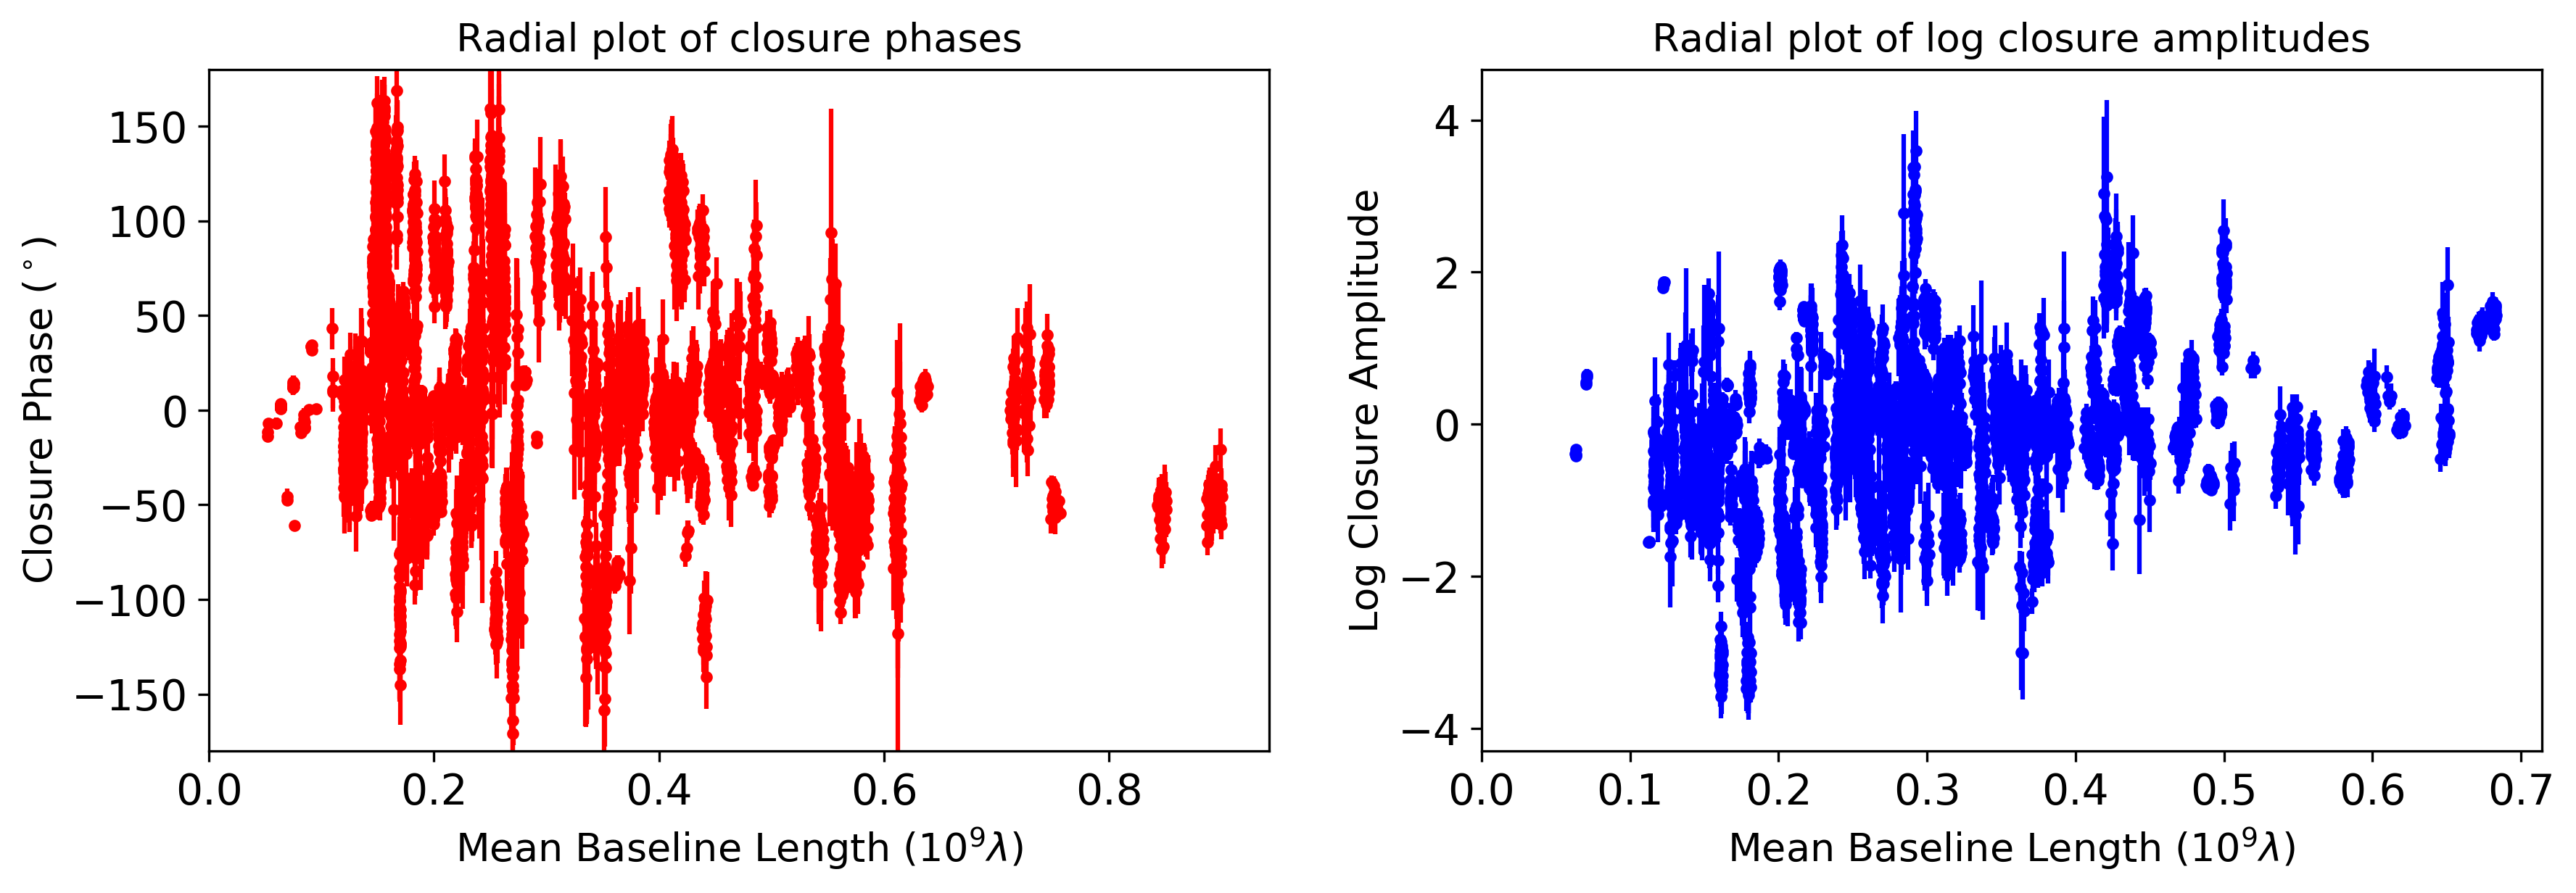

In [23]:
util.matplotlibrc(ncols=2, width=500, height=300)
fig, axs = plt.subplots(ncols=2)

plt.sca(axs[0])
plt.title("Radial plot of closure phases")
btable.radplot(color="red")

plt.sca(axs[1])
plt.title("Radial plot of log closure amplitudes")
ctable.radplot(color="blue")
plt.show()

*uvdata.BSTable* and *uvdata.CATable* have *vplot* methods similar to uvdata.VisTable.

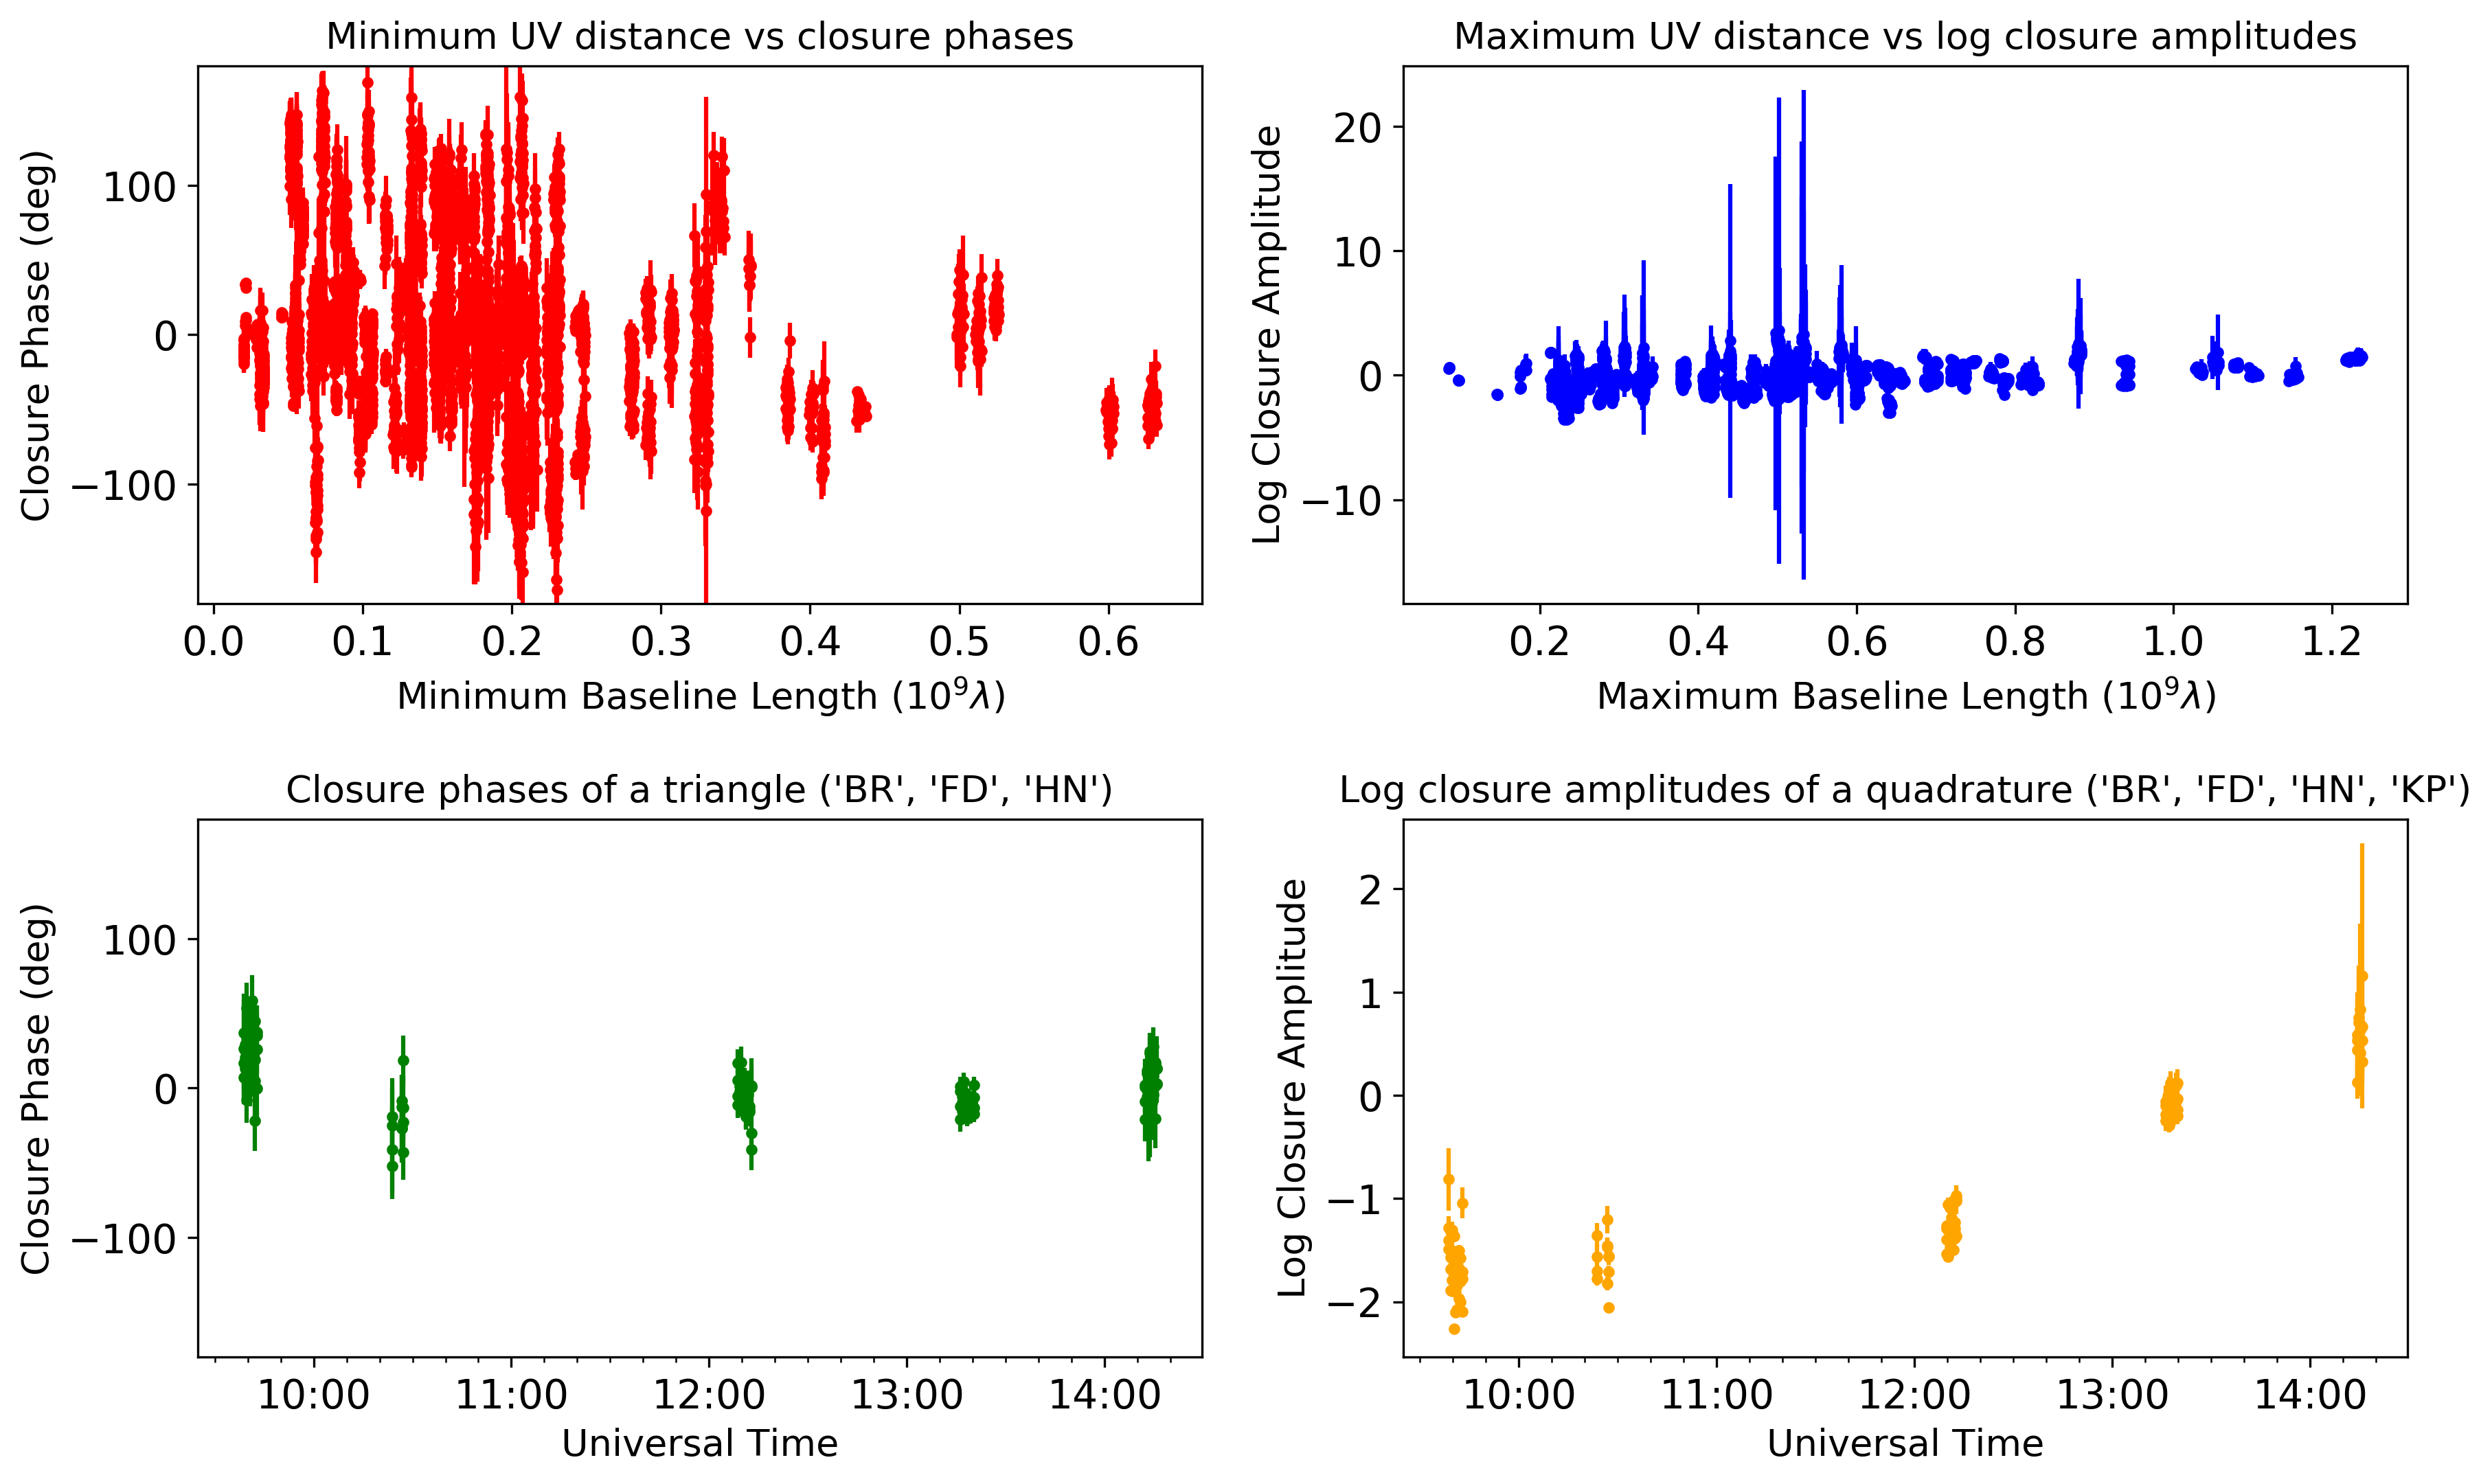

In [24]:
util.matplotlibrc(nrows=2,ncols=2, width=500, height=300)
fig, axs = plt.subplots(nrows=2,ncols=2, sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.4)

plt.sca(axs[0,0])
plt.title("Minimum UV distance vs closure phases")
btable.vplot(axis1="uvdmin", axis2="phase", color="red")

plt.sca(axs[0,1])
plt.title("Maximum UV distance vs log closure amplitudes")
ctable.vplot(axis1="uvdmax", axis2="logamp", color="blue")

plt.sca(axs[1,0])
plt.title("Closure phases of a triangle ('BR', 'FD', 'HN')")
btable.vplot(axis1="utc", axis2="phase", triangle=('BR', 'FD', 'HN'),color="green")

plt.sca(axs[1,1])
plt.title("Log closure amplitudes of a quadrature ('BR', 'FD', 'HN', 'KP')")
ctable.vplot(axis1="utc", axis2="logamp", quadrature=('BR', 'FD', 'HN', 'KP'),color="orange")
plt.show()

# By the way, you can get the combinations of baselines by
triangle_list = btable.triangle_list()
quadrature_list = ctable.quadrature_list()

## Acknowledgement

This notebook makes use of 43 GHz VLBA data from the VLBA-BU Blazar Monitoring Program (VLBA-BU-BLAZAR; 
http://www.bu.edu/blazars/VLBAproject.html), funded by NASA through the Fermi Guest Investigator Program. The VLBA is an instrument of the National Radio Astronomy Observatory. The National Radio Astronomy Observatory is a facility of the National Science Foundation operated by Associated Universities, Inc.